From the example: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

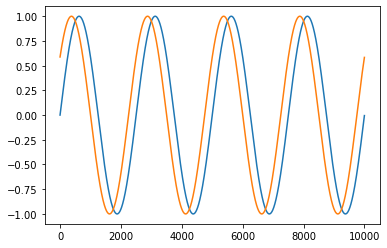

In [48]:
x = np.arange(128) / 128

PIT = 1
Fs = 10e3  # Sampling Freq
Freq = 4  # Jammer Freq
NumSamples = PIT * Fs  # Number of samples to process
t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
# sig1 = np.sin(2 * np.pi * x)
# sig2 = np.sin(2 * np.pi * x + 0.05*np.pi)
sig1 = 1 * np.exp(2j * np.pi * Freq * t)
sig2 = 1 * np.exp(2j * (np.pi * Freq * t + 0.1*np.pi))

sig1_noise = sig1 #+ np.random.randn(len(sig1))
sig2_noise = sig2 #+ np.random.randn(len(sig2))

plt.plot(sig1.imag)
plt.plot(sig2.imag)

In [41]:
corr = signal.correlate(sig1_noise, sig2_noise)

corr_lags = signal.correlation_lags(len(sig1_noise), len(sig2_noise))

corr /= np.max(corr)

/home/edmond/Documents/venv/development/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/edmond/Documents/venv/development/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/edmond/Documents/venv/development/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/edmond/Documents/venv/development/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


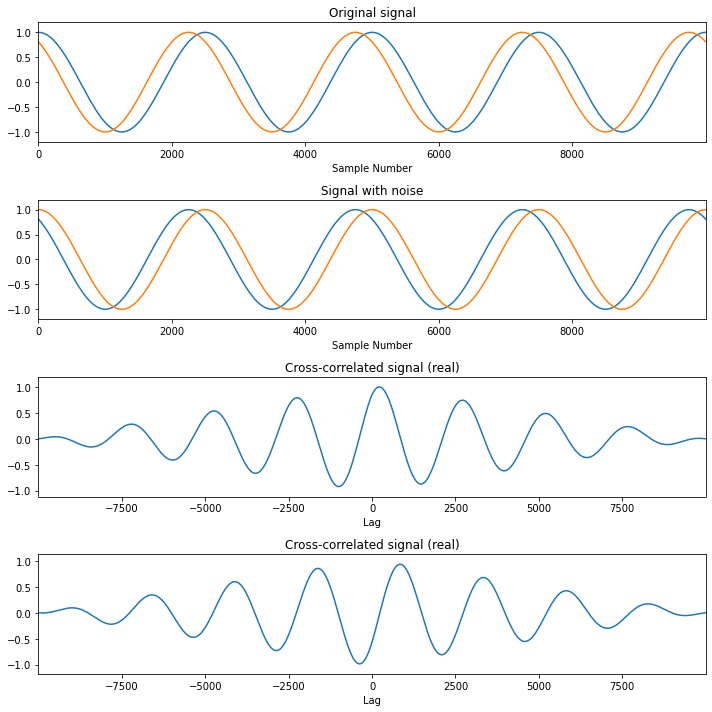

In [45]:

fig, (ax_orig, ax_noise, ax_corr_real, ax_corr_imag) = plt.subplots(4, 1, figsize=(10, 10))

ax_orig.plot(sig1)
ax_orig.plot(sig2)

ax_orig.set_title('Original signal')

ax_orig.set_xlabel('Sample Number')

ax_noise.plot(sig2_noise)
ax_noise.plot(sig1_noise)

ax_noise.set_title('Signal with noise')

ax_noise.set_xlabel('Sample Number')

ax_corr_real.plot(corr_lags, corr.real)

ax_corr_real.set_title('Cross-correlated signal (real)')

ax_corr_real.set_xlabel('Lag')

ax_corr_imag.plot(corr_lags, corr.imag)

ax_corr_imag.set_title('Cross-correlated signal (real)')

ax_corr_imag.set_xlabel('Lag')

ax_orig.margins(0, 0.1)

ax_noise.margins(0, 0.1)

ax_corr_real.margins(0, 0.1)

ax_corr_imag.margins(0, 0.1)

fig.tight_layout()

plt.show()

In [46]:
corr_lags[np.argmax(corr.real)]

218

In [47]:
corr_lags[np.argmin(corr.imag)]

-375